<a href="https://colab.research.google.com/github/piyushdubey490/Colab-Python/blob/main/Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**
Using the libraries of any programing language that you are familiar with, design and train ANNs for classification task of the following datasets. You need to design one ANN per dataset. Randomly select 70% of the data for training and the remaining 30% for testing. 

You need to report for each case:

1) Structure of ANN (number of layers and neurons in each layer), type of utilized activation functions.

2) Reporting training plot. Hint: a training plot shows the accuracy of a model per iteration.

3) Reporting train and test accuracy of classification

4) Reporting all steps of your design and training of ANNs

5) Conclusion remarks

Test Set 1: Iris Data Set http://archive.ics.uci.edu/ml/datasets/Iris

Test Set 2: Breast Cancer Wisconsin (Diagnostic) Data Set http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 

Test Set 3: Bank Marketing Data Set http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

**Headers**

In [90]:
# importing headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

## Iris Data Set

In [91]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [92]:
df.shape

(150, 5)

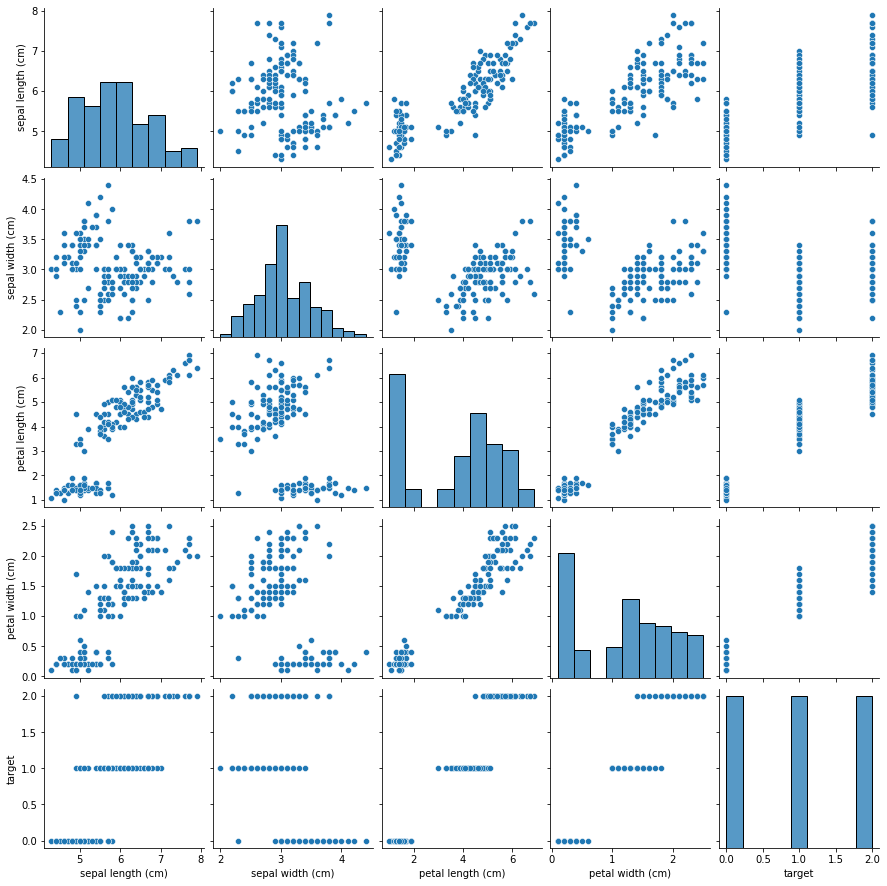

In [93]:
sns.pairplot(df);

Text(0.5, 1.0, 'sepal width vs length')

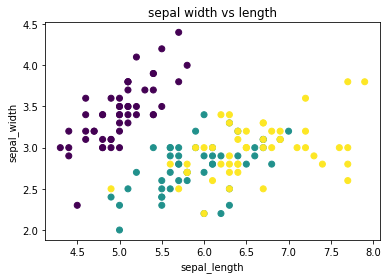

In [94]:
plt.scatter(x = df['sepal length (cm)'], y = df['sepal width (cm)'], c =  df['target'] )
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal width vs length')

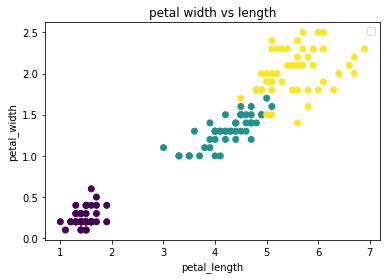

In [95]:
plt.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'], c = df['target'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal width vs length')
plt.legend();

In [96]:
X = df.drop(columns = ['target'])
y = tf.keras.utils.to_categorical(df['target'],3) 

print('X shape', X.shape)
print('y shape', y.shape)

X shape (150, 4)
y shape (150, 3)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=38)
print('X_train shape:', X_train.shape, '   X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape, '   y_test shape:', y_test.shape)


X_train shape: (105, 4)    X_test shape: (45, 4)
y_train shape: (105, 3)    y_test shape: (45, 3)


In [98]:
model_flower = keras.Sequential([
     keras.layers.Dense(25, input_shape = (4,), activation = 'relu'),
     keras.layers.Dense(15,activation = 'relu'),
     keras.layers.Dense(3, activation = 'softmax')
])

model_flower.compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model_flower.fit(X_train, y_train, epochs = 60)


Epoch 1/60
4/4 [==============================] - 0s 4ms/step - loss: 1.4905 - accuracy: 0.3143
Epoch 2/60
4/4 [==============================] - 0s 4ms/step - loss: 1.2353 - accuracy: 0.3143
Epoch 3/60
4/4 [==============================] - 0s 4ms/step - loss: 1.0658 - accuracy: 0.3143
Epoch 4/60
4/4 [==============================] - 0s 4ms/step - loss: 0.9654 - accuracy: 0.5048
Epoch 5/60
4/4 [==============================] - 0s 4ms/step - loss: 0.8993 - accuracy: 0.6476
Epoch 6/60
4/4 [==============================] - 0s 4ms/step - loss: 0.8604 - accuracy: 0.6476
Epoch 7/60
4/4 [==============================] - 0s 4ms/step - loss: 0.8231 - accuracy: 0.6476
Epoch 8/60
4/4 [==============================] - 0s 4ms/step - loss: 0.7884 - accuracy: 0.6476
Epoch 9/60
4/4 [==============================] - 0s 4ms/step - loss: 0.7536 - accuracy: 0.6476
Epoch 10/60
4/4 [==============================] - 0s 4ms/step - loss: 0.7197 - accuracy: 0.6476
Epoch 11/60
4/4 [======================

In [99]:
model_flower.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                125       
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 3)                 48        
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [100]:
#checking probab for  each class and choosing class with max probab
y_pred = pd.DataFrame(model_flower.predict(X_test))
y_pred = y_pred.idxmax(axis = 1) 
y_pred[:5]

2/2 [==============================] - 0s 6ms/step


0    0
1    2
2    2
3    0
4    2
dtype: int64

In [101]:
model_flower.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2233 - accuracy: 0.9556


[0.22330741584300995, 0.9555555582046509]

In [102]:
y_test = pd.DataFrame(y_test).idxmax(axis = 1)

In [103]:
accuracy_score(y_test, y_pred)

0.9555555555555556

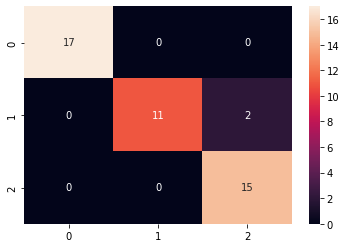

In [104]:
cm = tf.math.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

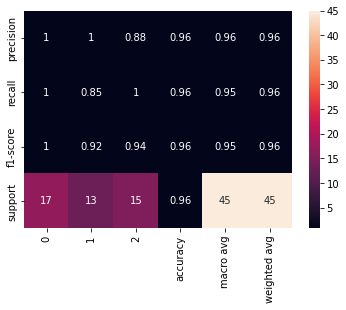

In [105]:
clf = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(clf), annot = True)

## Breast Cancer Wisconsin (Diagnostic) Data Set

In [106]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [107]:
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [108]:
df_features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [109]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [110]:
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [111]:
df = pd.concat([df_features, df_target], axis=1)

In [112]:
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [113]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [114]:
sns.set_style('darkgrid')

In [115]:
df['target'].value_counts()

Benign       357
Malignant    212
Name: target, dtype: int64

Text(0.5, 1.0, 'Count Plot of Diagnosis')

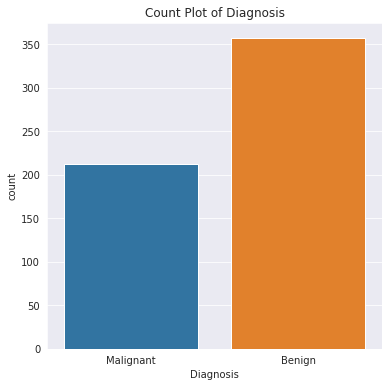

In [116]:
plt.figure(figsize=(6,6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)

In [118]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target',
                         var_name='features', value_name='value')
df_scaled_melt.head(5)

,target,features,value
0,Malignant,mean radius,1.097064
1,Malignant,mean radius,1.829821
2,Malignant,mean radius,1.579888
3,Malignant,mean radius,-0.768909
4,Malignant,mean radius,1.750297


In [119]:
def violin_plot(features, name):
    """
    This function creates violin plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=60)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def swarm_plot(features, name):
    """
    This function creates swarm plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def box_plot(features, name):
    """
    This function creates box plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(14, 10))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


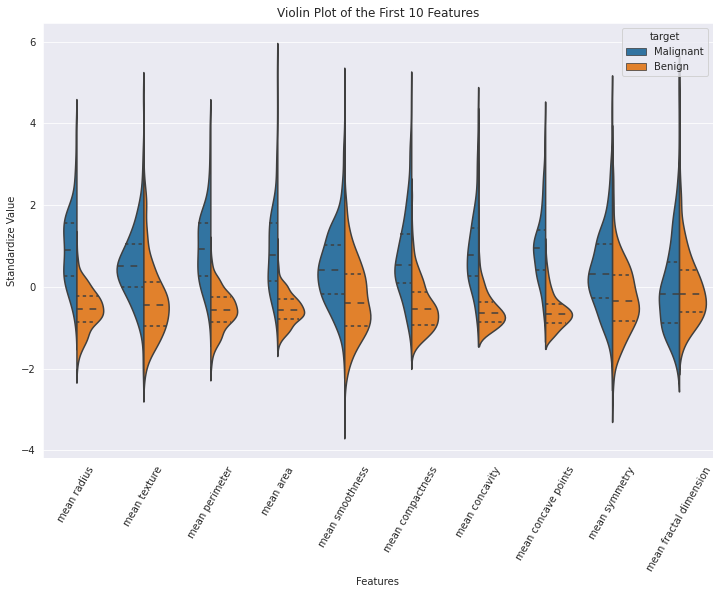

In [120]:
violin_plot(df.columns[0:10], "Violin Plot of the First 10 Features")


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; y

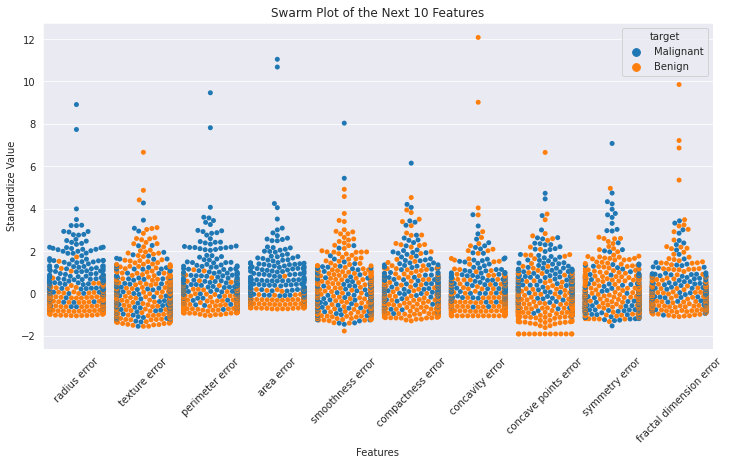

In [121]:
swarm_plot(df.columns[10:20], "Swarm Plot of the Next 10 Features")


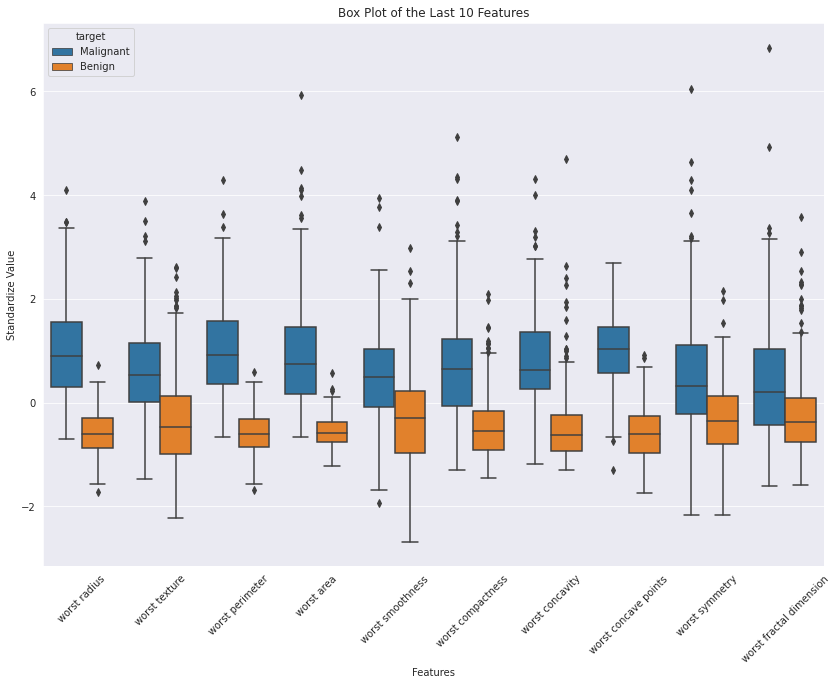

In [122]:
box_plot(df.columns[20:30], "Box Plot of the Last 10 Features")


In [123]:
def correlation(var):
    """
    1. Print correlation
    2. Create jointplot
    """
    # Print correlation
    print("Correlation: ", df[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(df[(var[0])], df[(var[1])], kind='reg')


Correlation:  0.9865068039913907


<Figure size 432x432 with 0 Axes>

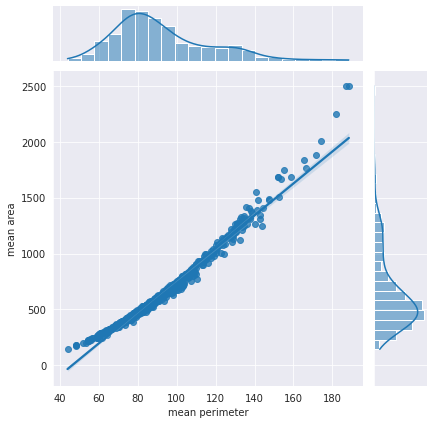

In [124]:
correlation(['mean perimeter', 'mean area'])


Correlation:  0.9213910263788588


<Figure size 432x432 with 0 Axes>

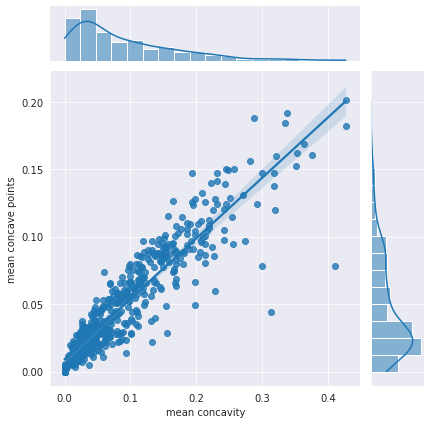

In [125]:
correlation(['mean concavity', 'mean concave points'])


Correlation:  0.537848206253609


<Figure size 432x432 with 0 Axes>

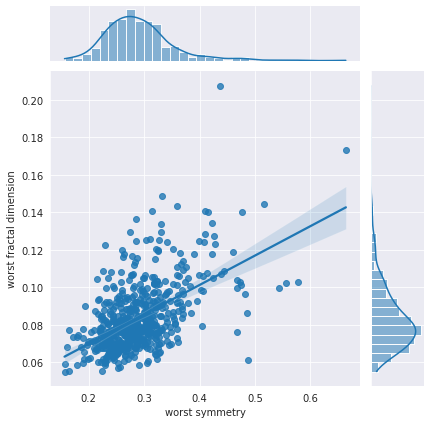

In [126]:
correlation(['worst symmetry', 'worst fractal dimension'])


<ipython-input-127-94577fc2074f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


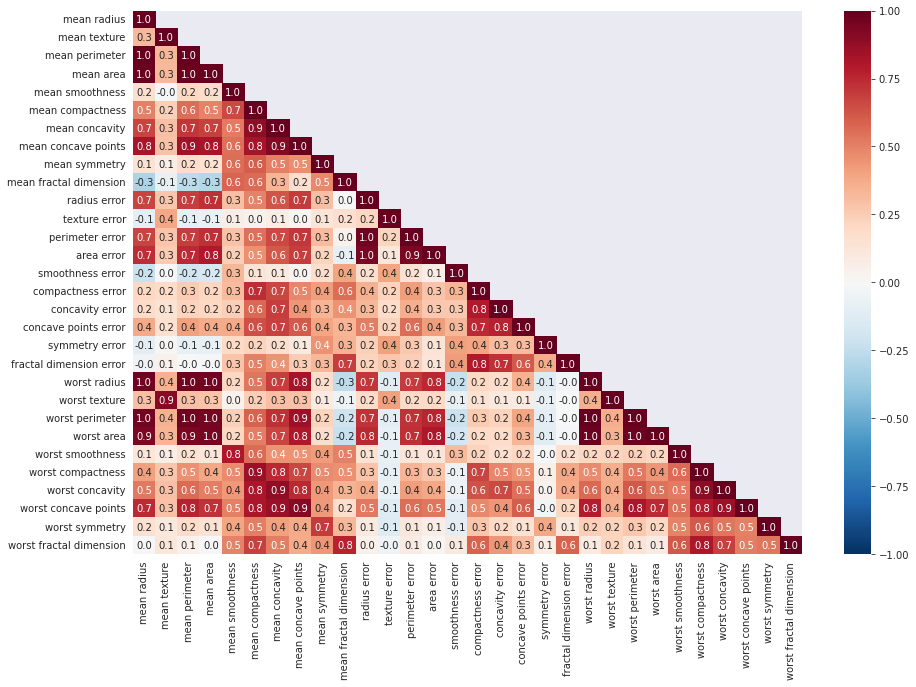

In [127]:
# Create correlation matrix
corr_mat = df.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)


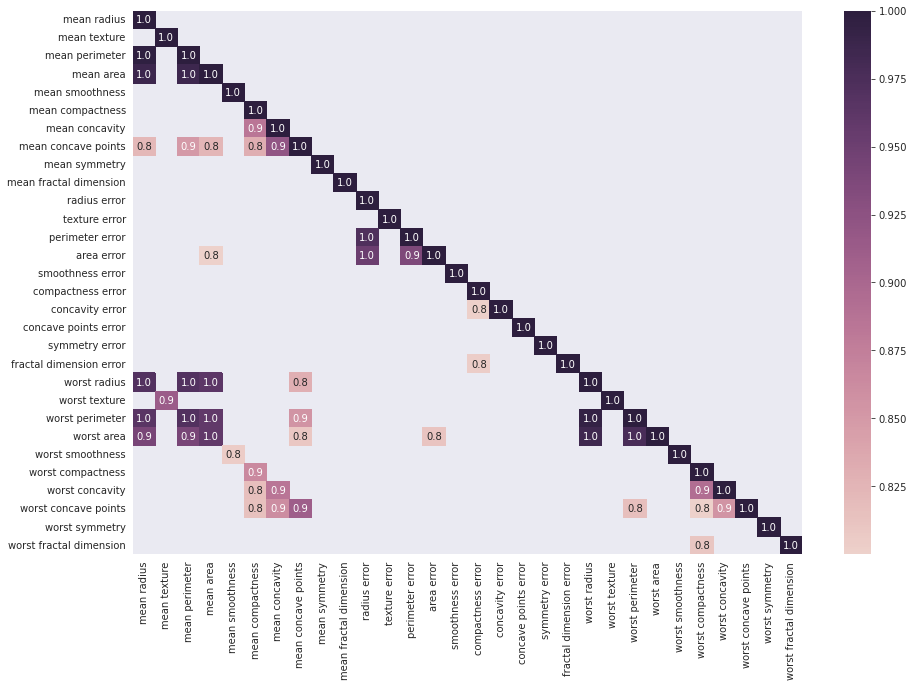

In [128]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)


In [129]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=6)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))


The five selected features are:  ['mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']


In [130]:
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()


,mean perimeter,mean area,area error,worst radius,worst perimeter,worst area
0,122.80,1001.0,153.40,25.38,184.60,2019.0
1,132.90,1326.0,74.08,24.99,158.80,1956.0
2,130.00,1203.0,94.03,23.57,152.50,1709.0
3,77.58,386.1,27.23,14.91,98.87,567.7
4,135.10,1297.0,94.44,22.54,152.20,1575.0


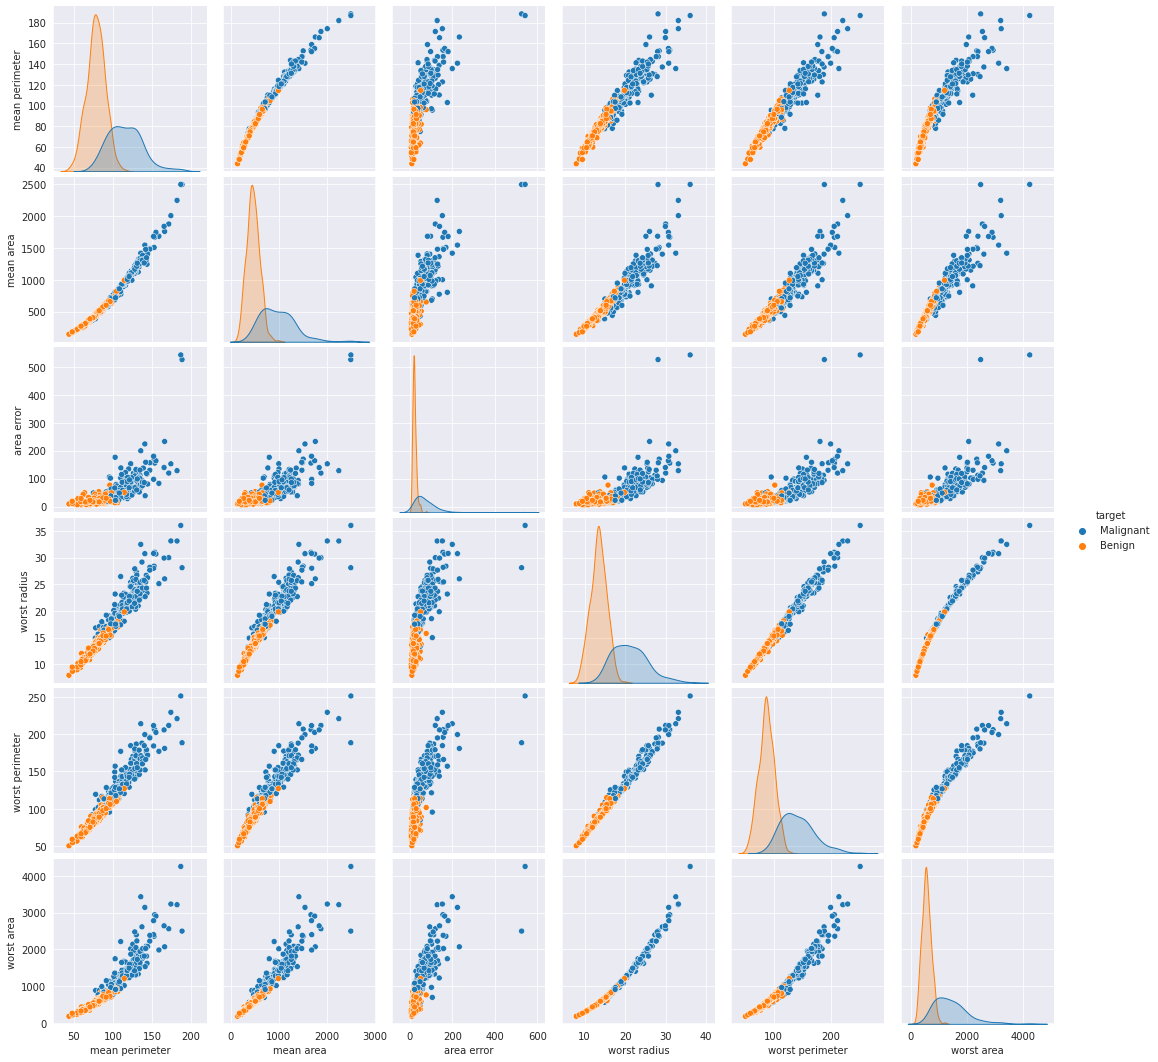

In [131]:
sns.pairplot(pd.concat([X, df['target']], axis=1), hue='target')


In [132]:
from sklearn.model_selection import train_test_split
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [133]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [134]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 60   3]
 [  2 106]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171




**In the first part of this , I performed exploratory data analysis to better understand each of 30 original features and how they might be associated with cancer.**

**Next, I selected 5 best features for my model using univariate feature selection, and performed Random Forst classifier. The accuracy rate of this model is around 96%**

## Bank Marketing Data Set

In [135]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [136]:
bank_url=pd.read_csv('/content/gdrive/MyDrive/bank/bank-full.csv',sep=';')

In [137]:
bank=bank_url
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [138]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [139]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [140]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
new_data = pd.read_csv('/content/gdrive/MyDrive/bank/bank-full.csv',sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


 **Checking for Outliers**

Age Shape: (45211, 17)


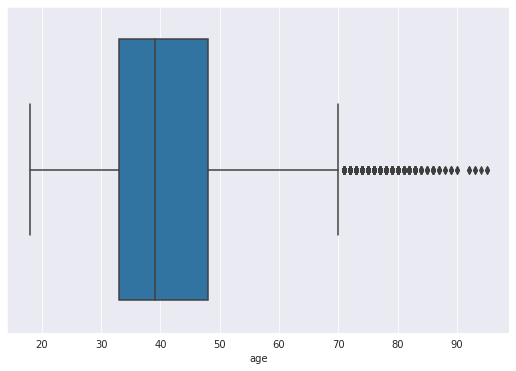

In [141]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Age Shape:",bank.shape)

max_val = bank.age.quantile(0.75)
min_val = bank.age.quantile(0.25)

sns.boxplot(bank['age'])
plt.show()

Balance Shape: (45211, 17)


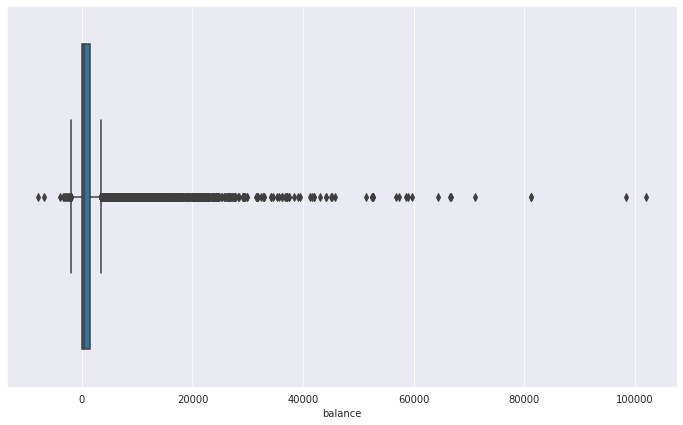

72.0


In [142]:
fig, axes = plt.subplots(figsize=(12, 7))

# Checking the box plot for balance feature
print("Balance Shape:",bank.shape)

max_val = bank.balance.quantile(0.75)
min_val = bank.balance.quantile(0.25)

sns.boxplot(bank['balance'])
plt.show()
print(min_val)

Day Shape: (45211, 17)


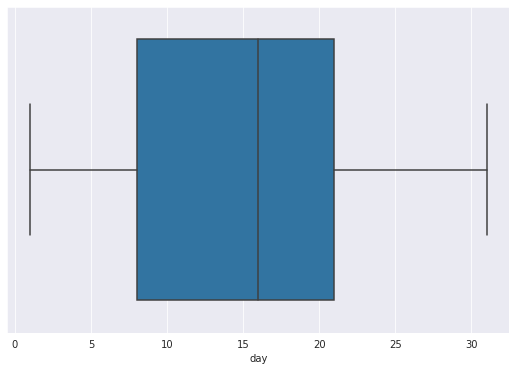

In [143]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for day feature
print("Day Shape:",bank.shape)

max_val = bank.balance.quantile(0.75)
min_val = bank.balance.quantile(0.25)

sns.boxplot(bank['day'])
plt.show()

Duration Shape: (45211, 17)


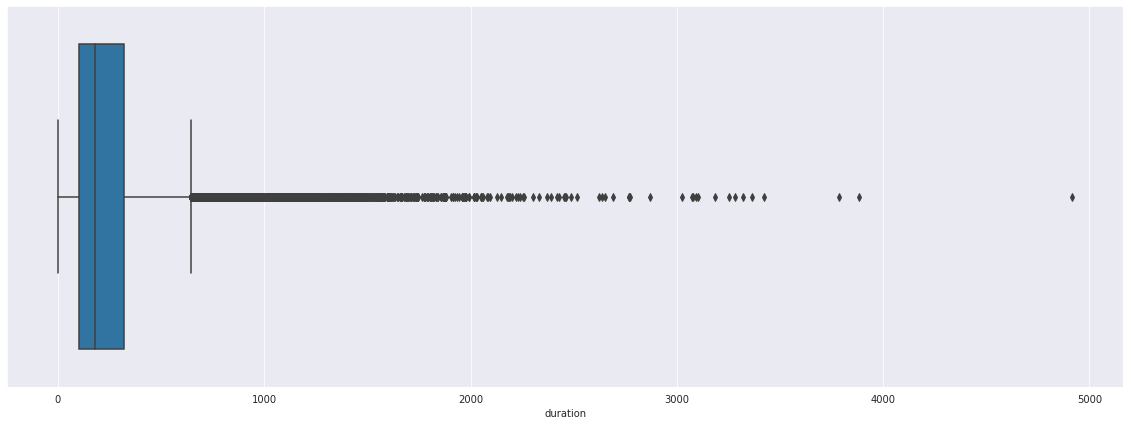

In [144]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for duration feature
print("Duration Shape:",bank.shape)

max_val = bank.balance.quantile(0.75)
min_val = bank.balance.quantile(0.25)

sns.boxplot(bank['duration'])
plt.show()

After Duration Shape: (45189, 17)


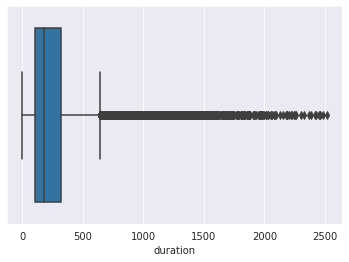

In [145]:
# removing datapoints that have duration values greater than 2600
bank = bank[(bank['duration']<2600)]

print("After Duration Shape:",bank.shape)

sns.boxplot(bank['duration'])
plt.show()

Campaign Shape: (45189, 17)


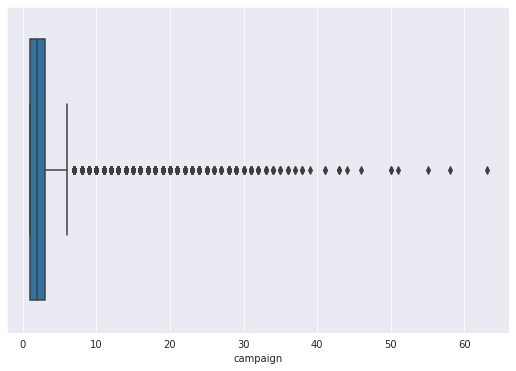

In [146]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for campaign feature
print("Campaign Shape:",bank.shape)

max_val = bank.campaign.quantile(0.75)
min_val = bank.campaign.quantile(0.25)

sns.boxplot(bank['campaign'])
plt.show()
     

After Campaign Shape: (45176, 17)


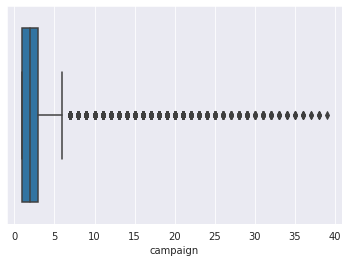

In [147]:
# removing datapoints that have campaign values greater than 2600
bank = bank[(bank['campaign']<40)]

print("After Campaign Shape:",bank.shape)

sns.boxplot(bank['campaign'])
plt.show()

pdays Shape: (45176, 17)


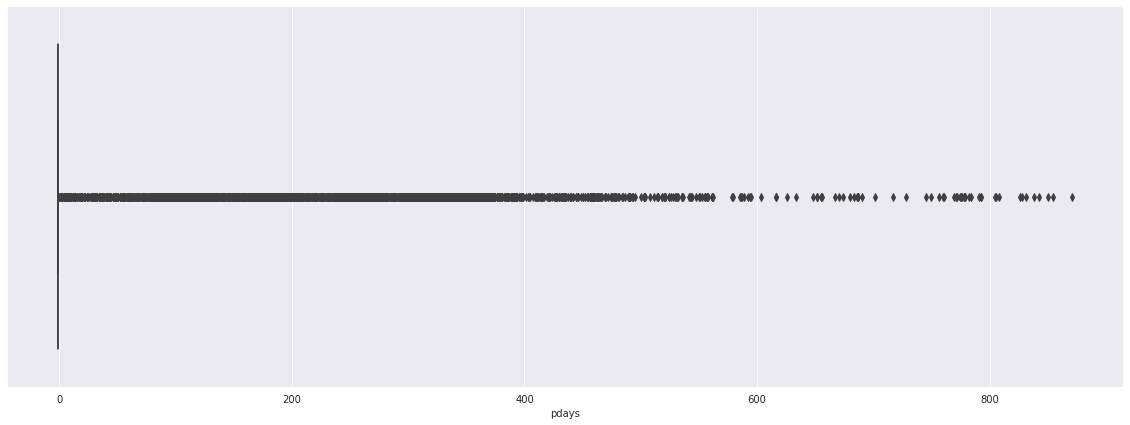

In [148]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for pdays feature
print("pdays Shape:",bank.shape)
## Max and Min Quantile
max_val = bank.pdays.quantile(0.75)
min_val = bank.pdays.quantile(0.25)

sns.boxplot(bank['pdays'])
plt.show()

After pdays Shape: (45115, 17)


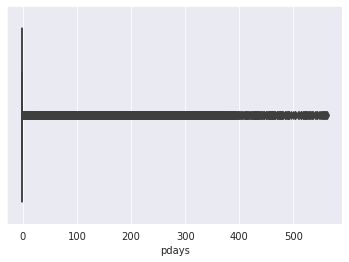

In [149]:
# removing datapoints that have pdays values greater than 575
bank = bank[(bank['pdays']<575)]

print("After pdays Shape:",bank.shape)

sns.boxplot(bank['pdays'])
plt.show()
     

previous Shape: (45115, 17)


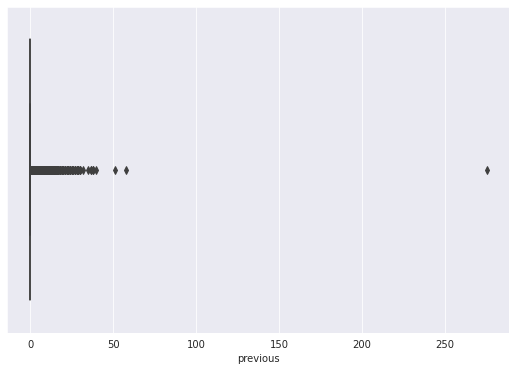

In [150]:

fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for previous feature
print("previous Shape:",bank.shape)
## Max and Min Quantile
max_val = bank.previous.quantile(0.75)
min_val = bank.previous.quantile(0.25)

sns.boxplot(bank['previous'])
plt.show()

After previous Shape: (45112, 17)


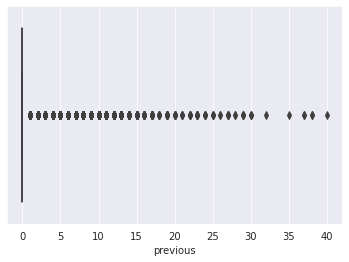

In [151]:
# removing datapoints that have previous values greater than 50
bank = bank[(bank['previous']<50)]

print("After previous Shape:",bank.shape)

sns.boxplot(bank['previous'])
plt.show()

In [152]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
bank['y'] = LabelEncoder().fit_transform(bank['y'])
bank['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45112, dtype: int64

In [153]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
bank['education'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
bank["education"] = bank["education"].replace(education_mapper)
bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [154]:
bank.drop(['duration'], inplace=True, axis = 1)


bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,4,-1,0,unknown,0


In [155]:
# Using OneHotEncoding pandas.get_dummies listing down the features that has categorical data
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']

for item in categorial_features:
    # assigning the encoded data into a new DataFrame object
    df = pd.get_dummies(bank[item], prefix=item)
    bank = bank.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column in bank to have corresponding df values
        bank[categorial_feature] = df[categorial_feature]

In [156]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    bank.replace({item:bin_dict},inplace=True)

In [157]:
# rearrange the columns in the dataset to contain the y (target/label) at the end

cols = list(bank.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
bank = bank[cols+['y']] #Create new dataframe with columns in new order

In [158]:
bank.describe()

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
count,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,...,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000,45112.000000
mean,40.935716,2.019197,0.018066,1362.507825,0.555839,0.160201,15.805395,2.752793,39.297659,0.566900,...,0.010485,0.304908,0.087959,0.016138,0.012369,0.107665,0.040388,0.033450,0.818496,0.116444
std,10.619996,0.902772,0.133192,3044.988910,0.496878,0.366797,8.322010,3.000533,97.013178,1.843721,...,0.101859,0.460373,0.283238,0.126006,0.110528,0.309961,0.196871,0.179811,0.385439,0.320760
min,18.000000,-1.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,72.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,2.000000,0.000000,449.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,3.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,39.000000,562.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Splitting Data**

In [159]:
y = bank['y']
X = bank.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [160]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [161]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,-0.170256,-0.020279,0.094072,-0.187009,-0.015242,-0.010065,0.005081,-0.022524,0.004365,...,0.051031,0.029604,-0.126754,0.032917,0.063623,0.030149,-0.004293,-0.023976,0.042854,-0.004130
1,-0.170256,1.000000,-0.003958,0.041938,-0.025227,0.014644,0.014963,0.007177,0.003167,0.026507,...,-0.065376,0.024826,-0.074208,0.054993,0.008268,0.005354,0.019489,0.007532,0.028700,-0.032813
2,-0.020279,-0.003958,1.000000,-0.068013,-0.001653,0.080578,0.012571,0.016644,-0.029289,-0.019428,...,0.005853,-0.014384,0.000472,0.006953,-0.017206,-0.012682,-0.023415,-0.016823,-0.022288,0.037748
3,0.094072,0.041938,-0.068013,1.000000,-0.068603,-0.082802,0.004895,-0.014905,0.003296,0.023652,...,0.037774,0.026701,-0.074263,0.114391,0.044230,0.023210,0.013175,0.012671,0.026365,-0.029264
4,-0.187009,-0.025227,-0.001653,-0.068603,1.000000,0.048790,-0.028724,-0.031299,0.129392,0.041730,...,-0.102094,-0.066606,0.428394,0.001644,-0.086354,-0.080593,0.108548,0.037889,-0.088771,-0.065764
5,-0.015242,0.014644,0.080578,-0.082802,0.048790,1.000000,0.009385,0.011261,-0.020946,-0.013761,...,-0.028512,-0.028581,-0.022489,0.011767,-0.032348,-0.033141,-0.003223,-0.007912,-0.050949,0.030181
6,-0.010065,0.014963,0.012571,0.004895,-0.028724,0.009385,1.000000,0.167539,-0.089351,-0.053372,...,-0.196615,-0.020969,-0.029081,0.095228,0.027973,-0.052234,-0.061915,-0.029062,-0.032476,0.079726
7,0.005081,0.007177,0.016644,-0.014905,-0.031299,0.011261,0.167539,1.000000,-0.090977,-0.045012,...,0.046729,-0.018556,-0.074980,-0.085439,-0.051438,-0.037403,-0.090060,-0.021647,-0.058926,0.110858
8,-0.022524,0.003167,-0.029289,0.003296,0.129392,-0.020946,-0.089351,-0.090977,1.000000,0.548709,...,-0.118938,0.030022,0.092010,0.006694,0.045543,0.054293,0.714677,0.388777,0.232776,-0.881756
9,0.004365,0.026507,-0.019428,0.023652,0.041730,-0.013761,-0.053372,-0.045012,0.548709,1.000000,...,-0.075307,0.035791,0.003161,0.044290,0.066088,0.068542,0.428363,0.371637,0.249004,-0.649753


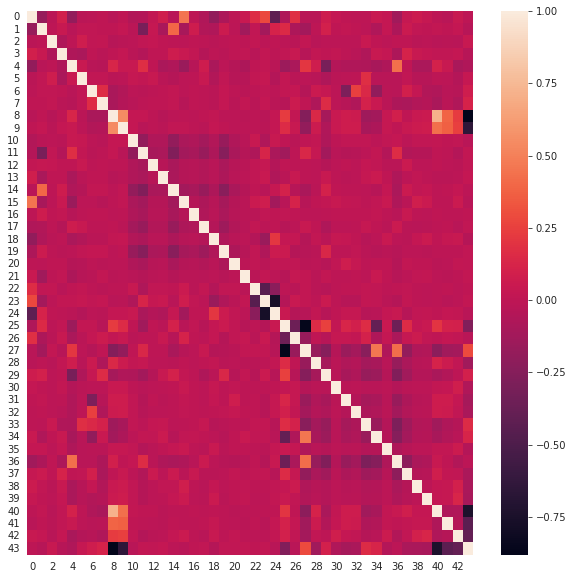

In [162]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [163]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN -0.170256 -0.020279  0.094072 -0.187009 -0.015242 -0.010065  0.005081   
1  NaN       NaN -0.003958  0.041938 -0.025227  0.014644  0.014963  0.007177   
2  NaN       NaN       NaN -0.068013 -0.001653  0.080578  0.012571  0.016644   
3  NaN       NaN       NaN       NaN -0.068603 -0.082802  0.004895 -0.014905   
4  NaN       NaN       NaN       NaN       NaN  0.048790 -0.028724 -0.031299   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.009385  0.011261   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.167539   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

<ipython-input-163-baf939ba7f7a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


In [164]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.571031,-3.344398,-0.135641,-0.427431,0.893914,-0.436763,1.705689,0.415666,-0.415388,-0.307480,...,-0.365799,-0.102937,1.509861,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
1,0.476868,-3.344398,-0.135641,-0.446150,-1.118675,2.289574,1.825854,0.415666,-0.415388,-0.307480,...,-0.365799,-0.102937,-0.662313,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
2,1.324336,1.086447,-0.135641,0.265519,0.893914,2.289574,-0.337109,0.748944,1.409127,0.234908,...,-0.365799,-0.102937,1.509861,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,5.375434,-2.123564
3,-0.088110,1.086447,-0.135641,-0.217576,0.893914,-0.436763,0.624208,1.082222,-0.415388,-0.307480,...,-0.365799,-0.102937,-0.662313,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
4,-0.464762,-0.021264,-0.135641,-0.285228,0.893914,-0.436763,-0.817768,0.082389,-0.415388,-0.307480,...,-0.365799,-0.102937,1.509861,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31573,-1.123903,-3.344398,-0.135641,-0.399844,-1.118675,-0.436763,-0.216945,-0.584167,-0.415388,-0.307480,...,-0.365799,-0.102937,-0.662313,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
31574,-0.747251,-0.021264,-0.135641,-0.457973,-1.118675,-0.436763,1.104866,3.081889,-0.415388,-0.307480,...,-0.365799,-0.102937,-0.662313,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
31575,0.006053,-0.021264,-0.135641,-0.042860,-1.118675,-0.436763,-1.298426,-0.584167,-0.415388,-0.307480,...,-0.365799,-0.102937,-0.662313,-0.310551,-0.128071,-0.111911,-0.347355,-0.205154,-0.186031,0.470906
31576,0.759357,-0.021264,-0.135641,-0.404114,0.893914,-0.436763,-0.096780,-0.584167,3.202717,0.234908,...,-0.365799,-0.102937,1.509861,-0.310551,-0.128071,-0.111911,2.878895,-0.205154,-0.186031,-2.123564


**Multilayer Perceptron**

In [165]:
from sklearn.neural_network import MLPClassifier 

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(PCA_X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 200, 50), max_iter=300, random_state=1)

In [166]:
PCA_X_train

array([[-2.33674846e+00,  2.64473606e+00,  1.62189532e+00, ...,
         3.97735740e-01,  1.18853582e+00,  1.60986328e+00],
       [-8.51260836e-01, -1.64250737e+00,  1.65292478e+00, ...,
        -3.06748810e-01,  1.59911199e+00,  2.68293683e+00],
       [ 2.08886256e+00,  1.11114045e+00,  9.79466441e-01, ...,
        -5.11819580e-01, -1.42907104e+00,  4.71799415e-01],
       ...,
       [ 3.42289940e-01, -9.82690171e-01, -5.74105912e-01, ...,
         7.23033959e-01,  1.30141199e+00, -3.86919842e-01],
       [ 3.69137572e+00,  2.41696261e+00,  4.67777712e-02, ...,
        -6.55774713e-01, -5.29303377e-04, -3.15025473e-02],
       [-3.16574393e-02, -1.50135915e+00, -2.39599497e+00, ...,
        -8.54258553e-01,  2.65996239e-01, -6.77893307e-01]])

Accuracy
0.8634550022166396


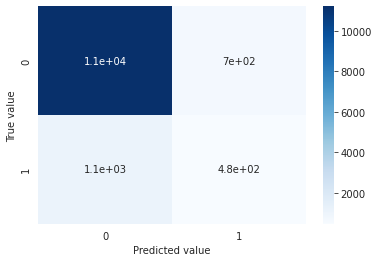

In [167]:
print('Accuracy')
print(mlp.score(PCA_X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(PCA_X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [173]:
from sklearn.metrics import accuracy_score, mean_squared_error

# print the training error and MSE
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(PCA_X_train, y_train))
print("Test set score: %f" % mlp.score(PCA_X_test, y_test))
print(accuracy_score(y_test, predict))

print("MSE: %f" % mean_squared_error(y_test, predict))
     

Training error: 0.071153
Training set score: 0.977136
Test set score: 0.863455
0.8634550022166396
MSE: 0.136545


# Conclusion

In each section depending upon the data , i did preprocessing where reqd . and applied algorithms and trained the dataset in 70:30 ratio as per question.

After each training , the accuracy and coorelation matrix aree there .

The Plots (pair , heat maps etc..) are plotted in the respective sections of the dataset work , above .

Training & Accuracy  are mentioned above in each section .